#### **모두를 위한 딥러닝**
slide
https://drive.google.com/drive/folders/1qVcF8-tx9LexdDT-IY6qOnHc8ekDoL03

git
https://github.com/deeplearningzerotoall/PyTorch?tab=readme-ov-file

youtube
https://www.youtube.com/watch?v=7eldOrjQVi0&list=PLQ28Nx3M4JrhkqBVIXg-i5_CVVoS1UzAv


---

### Maximum Likelihood Estimation (MLE)

$$L(\theta) = P(K=k | \theta) = \binom{n}{k} \theta^k (1-\theta)^{n-k}$$

- 관측된 데이터에서 $k$(여기서는 성공 횟수)가 나올 확률을 가장 높게 만드는 파라미터 $\theta$를 찾는 것입니다. 
    - 데이터를 가장 잘 설명하는 $\theta$ 찾기.
- 즉, 미분값이 0되는 지점 

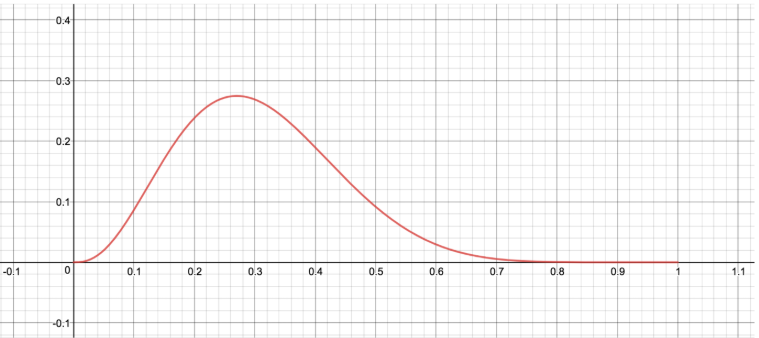

In [4]:
from IPython.display import Image, display
display(Image(filename='1.png', embed=True))

- gradient ascent를 통해 local maximum을 찾으며, Gradient descent(local minimum)와 반대다. 

**overfitting**

- train data에 과적합되어서 훈련데이터에 대한 성능은 좋으나 test data에 대한 성능이 좋지 않음.

- 해결방안
    - val loss 기준으로 학습
    - data argumentation
    - regularization
        - Early Stopping : Val loss가 더이상 낮아지지 않을때
        - Reducing network size
        - L1, L2 Regularization
    - Dropout
    - Batch Normalizaiton


**Data Preprocessing**

- train data에 과적합되어서 훈련데이터에 대한 성능은 좋으나 test data에 대한 성능이 좋지 않음.

- 해결방안
    - val loss 기준으로 학습
    - data argumentation
    - regularization
        - Early Stopping : Val loss가 더이상 낮아지지 않을때
        - Reducing network size
        - L1, L2 Regularization
    - Dropout
    - Batch Normalizaiton


In [6]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1)

# 1. 데이터 및 모델 초기화
x_train = torch.FloatTensor([[1, 2, 1],
                             [1, 3, 2],
                             [1, 3, 4],
                             [1, 5, 5],
                             [1, 7, 5],
                             [1, 2, 5],
                             [1, 6, 6],
                             [1, 7, 7]
                            ])
y_train = torch.LongTensor([2, 2, 2, 1, 1, 1, 0, 0])

x_test = torch.FloatTensor([[2, 1, 1], [3, 1, 2], [3, 3, 4]])
y_test = torch.LongTensor([2, 2, 2])

# 2. nn.Module로 모델 생성
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 3)
    def forward(self, x):
        return self.linear(x)
    
model = SoftmaxClassifierModel()
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [13]:
def train(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):

        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.cross_entropy(prediction, y_train)

        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

In [14]:
def test(model, optimizer, x_test, y_test):
    prediction = model(x_test)
    predicted_classes = prediction.max(1)[1]
    correct_count = (predicted_classes == y_test).sum().item()
    cost = F.cross_entropy(prediction, y_test)

    print('Accuracy: {}% Cost: {:.6f}'.format(
         correct_count / len(y_test) * 100, cost.item()
    ))

In [20]:
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 0.949140
Epoch    1/20 Cost: 0.948625
Epoch    2/20 Cost: 0.948112
Epoch    3/20 Cost: 0.947599
Epoch    4/20 Cost: 0.947088
Epoch    5/20 Cost: 0.946578
Epoch    6/20 Cost: 0.946069
Epoch    7/20 Cost: 0.945562
Epoch    8/20 Cost: 0.945055
Epoch    9/20 Cost: 0.944549
Epoch   10/20 Cost: 0.944045
Epoch   11/20 Cost: 0.943541
Epoch   12/20 Cost: 0.943039
Epoch   13/20 Cost: 0.942537
Epoch   14/20 Cost: 0.942036
Epoch   15/20 Cost: 0.941537
Epoch   16/20 Cost: 0.941038
Epoch   17/20 Cost: 0.940540
Epoch   18/20 Cost: 0.940043
Epoch   19/20 Cost: 0.939547


In [23]:
test(model, optimizer, x_test, y_test)

Accuracy: 33.33333333333333% Cost: 1.117588


---

### Weight Decay


**L1 Regularization**
- Loss에 weight의 절대값 합을 더함
- weight의 크기에 상관없이 미분시 $\pm1$ (또는 설정한 상수 $\lambda$) 이 나오므로 중요도가 낮은 가중치를 0으로 만드는 효과가 있음.

**L2 Regularization**
- weight의 제곱을 loss에 더해서 Loss로 사용.
- 미분시 2w로 웨이트에 비례하여 Loss를 줄이므로, weight가 클수록 더 강하게 압박하고, 0에 가까워질수록 압박하는 힘이 약해집니다. 따라서 가중치를 완전히 0으로 만들기보다는 **전체적으로 가중치 값을 작고 고르게 유지(Weight Decay)**




In [12]:
# L2 정규화(Weight Decay)를 적용할 때
# 내부적으로 미분 시 2 * weight_decay * weight 가 더해집니다.
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)